<a href="https://colab.research.google.com/github/MrAgui/LE1_Aguilar_KJ/blob/main/LE2_AGUILAR_KJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I.** **Understanding the problem**

Dataset info
*   Source: https://archive.ics.uci.edu/dataset/42/glass+identification
*   Problem: to classify different types of glass based on their chemical composition.



In [ ]:
import requests
import pandas as pd
import warnings
# Define the URL of the Glass Identification dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Download the dataset
response = requests.get(url)

# Save the downloaded data to a file
file_path = "./glass_data.csv"
with open(file_path, 'wb') as f:
    f.write(response.content)

# Define column names
column_names = [
    "Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"
]

# Load the dataset into a pandas DataFrame
glass_df = pd.read_csv(file_path, names=column_names)

# Display the first few rows of the DataFrame
print(glass_df.head(), "\n")
print(glass_df.info(), "\n")
print(glass_df.describe(), "\n")

warnings.filterwarnings("ignore", category=ImportWarning)

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64 

# **II.** **Data Preparation**



In [ ]:
def data_quality_checks(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("[!] No missing values")
    else:
        print("Missing values:\n", missing_values)

    # Check for duplicates
    duplicates = df.duplicated().sum()
    if duplicates == 0:
        print("[!] No duplicates found")
    else:
        print("Number of duplicates:", duplicates)

    # Check summary statistics
    summary_stats = df.describe()

    return summary_stats

summary_stats = data_quality_checks(glass_df)

# Print summary statistics
print("Summary statistics:\n", summary_stats)

[!] No missing values
[!] No duplicates found
Summary statistics:
                Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  

# **III. Data Visualization**

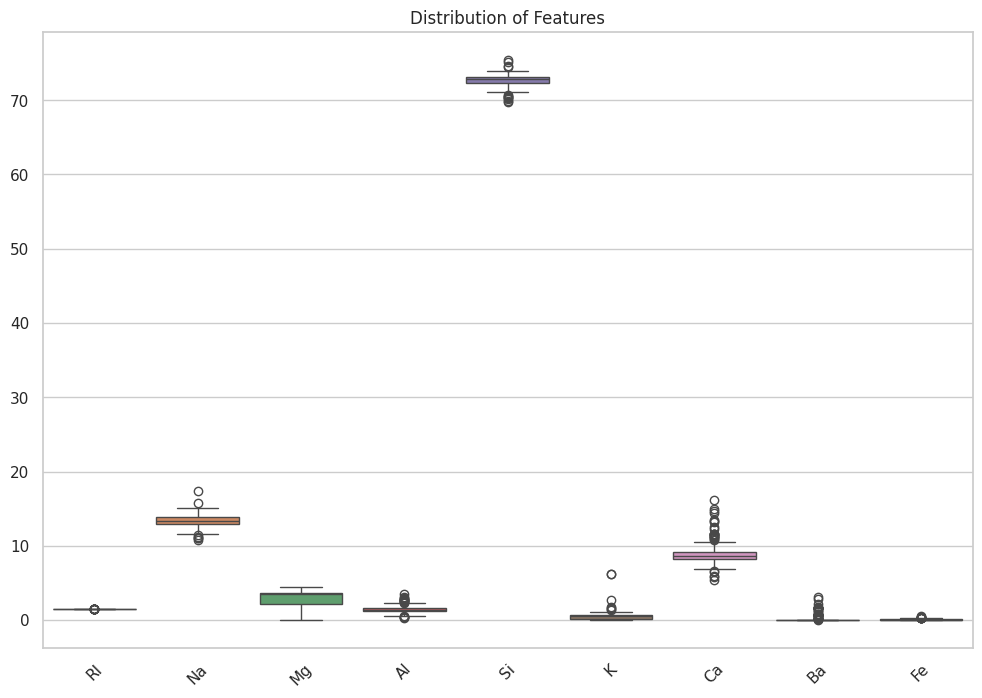

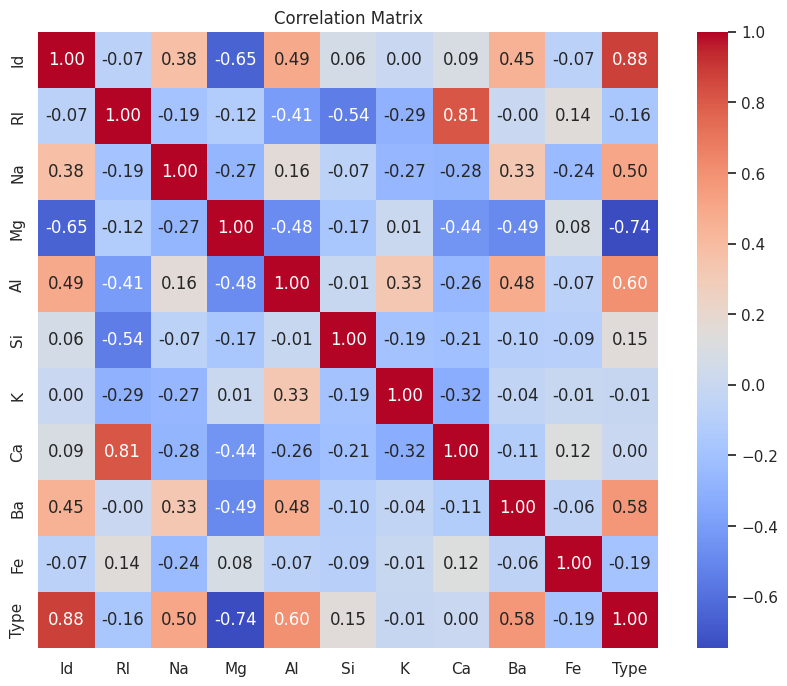

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of features
plt.figure(figsize=(12, 8))
sns.boxplot(data=glass_df.drop(columns=["Id", "Type"]))
plt.title("Distribution of Features")
plt.xticks(rotation=45)
plt.show()

# Check for correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(glass_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **IV. Model Selection**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define pipeline for Logistic Regression
logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ("logistic", LogisticRegression(random_state=42))  # Logistic Regression model
])

# Define pipeline for Random Forests
random_forest_pipeline = Pipeline([
    ("random_forest", RandomForestClassifier(random_state=42))  # Random Forest Classifier model
])

# Define pipeline for Support Vector Machines (SVM)
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ("svm", SVC(kernel="rbf", random_state=42))  # SVM Classifier model with radial basis function kernel
])

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = glass_df.drop(columns=["Id", "Type"])  # Features
y = glass_df["Type"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
logistic_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

# **V. Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Function to evaluate and display results for a given model
def evaluate_model(model, X_test, y_test):
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Display evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=range(1, 8), yticklabels=range(1, 8))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Evaluation results for Logistic Regression model:
Accuracy: 0.7209302325581395
Precision: 0.6922182468694096
Recall: 0.7209302325581395
F1-score: 0.6921188630490958


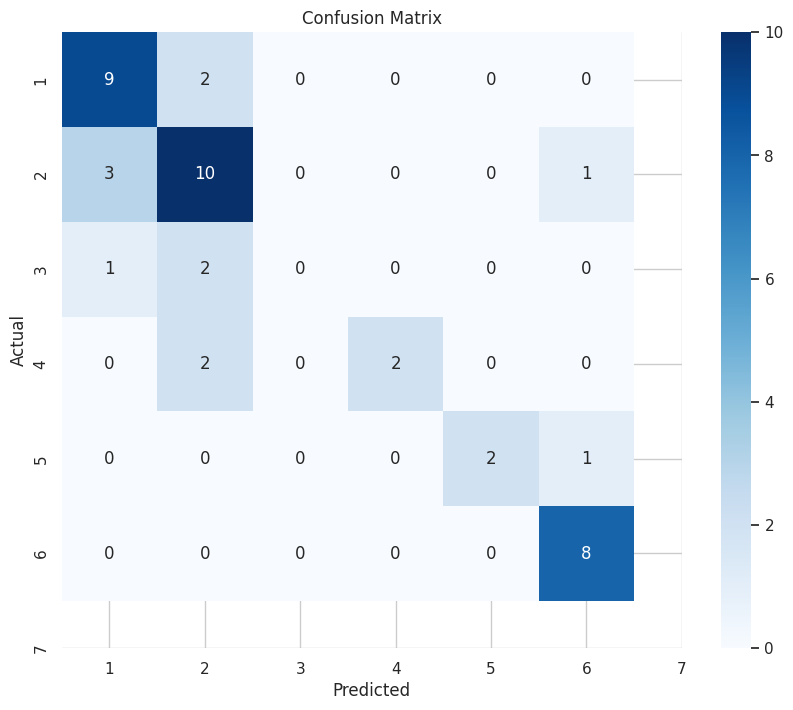

In [ ]:
# Evaluate Logistic Regression model
print("Evaluation results for Logistic Regression model:")
evaluate_model(logistic_pipeline, X_test, y_test)



Evaluation results for Random Forests model:
Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-score: 0.8330452594474481


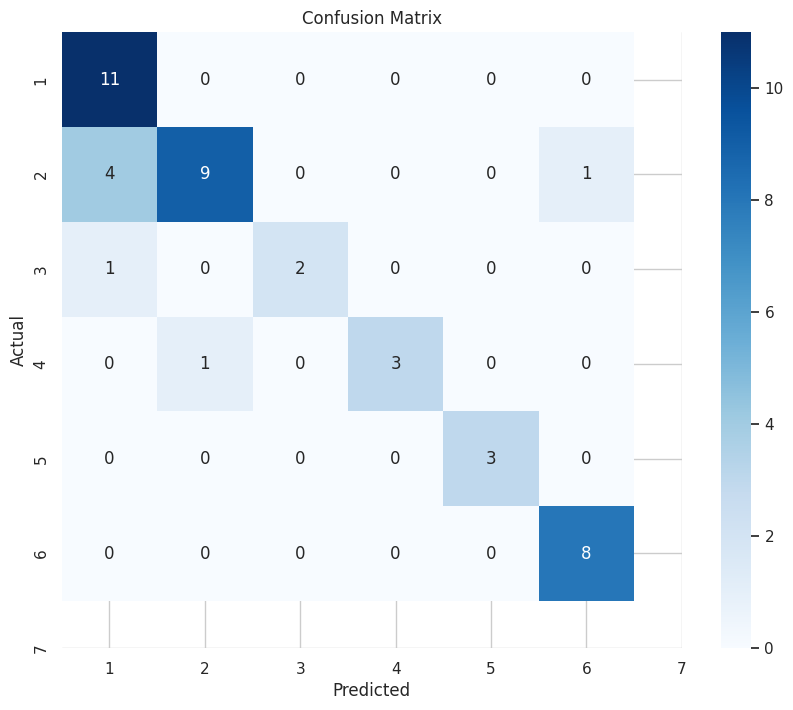

In [ ]:
# Evaluate Random Forests model
print("\nEvaluation results for Random Forests model:")
evaluate_model(random_forest_pipeline, X_test, y_test)


Evaluation results for SVM model:
Accuracy: 0.7209302325581395
Precision: 0.6758720930232558
Recall: 0.7209302325581395
F1-score: 0.6876864262590003


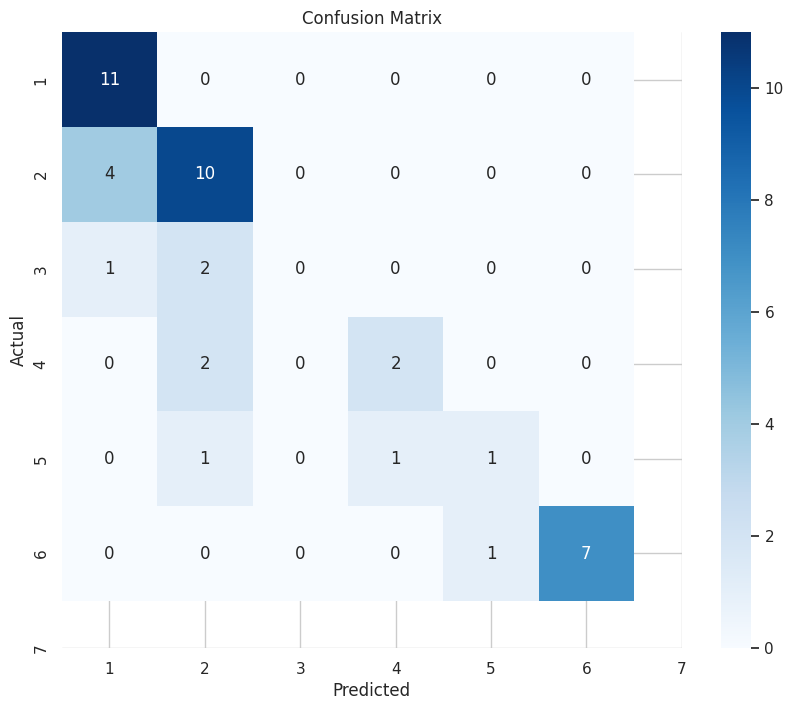

In [ ]:
# Evaluate SVM model
print("\nEvaluation results for SVM model:")
evaluate_model(svm_pipeline, X_test, y_test)

# **VI. Model Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
logistic_params = {
    "logistic__C": [0.01, 0.1, 1, 10, 100]  # Regularization parameter values
}

logistic_grid_search = GridSearchCV(logistic_pipeline, param_grid=logistic_params, cv=5)
logistic_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for Random Forests
random_forest_params = {
    "random_forest__n_estimators": [50, 100, 150],  # Number of trees
    "random_forest__max_depth": [None, 10, 20]  # Maximum depth of trees
}

random_forest_grid_search = GridSearchCV(random_forest_pipeline, param_grid=random_forest_params, cv=5)
random_forest_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for SVM
svm_params = {
    "svm__C": [0.01, 0.1, 1, 10, 100],  # Regularization parameter values
    "svm__kernel": ["linear", "rbf", "poly"]  # Kernel types
}

svm_grid_search = GridSearchCV(svm_pipeline, param_grid=svm_params, cv=5)
svm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for each model
print("Best hyperparameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best hyperparameters for Random Forests:", random_forest_grid_search.best_params_)
print("Best hyperparameters for SVM:", svm_grid_search.best_params_)

Best hyperparameters for Logistic Regression: {'logistic__C': 100}
Best hyperparameters for Random Forests: {'random_forest__max_depth': 10, 'random_forest__n_estimators': 150}
Best hyperparameters for SVM: {'svm__C': 100, 'svm__kernel': 'rbf'}


# **VII**. **Summary**

In [ ]:
def print_evaluation_results(model_name, accuracy, f1, precision, recall):
    print(f"{model_name:<20} | {accuracy:.4f}   | {f1:.4f}    | {precision:.4f}   | {recall:.4f}")

# Print evaluation results before hyperparameter tuning
print("Before hyperparameter tuning:")
print("\nModel\t\t     | Accuracy\t| F1 score  |Precision\t|Recall")
print("-" * 70)
print_evaluation_results("SVM", accuracy_score(y_test, svm_pipeline.predict(X_test)),
                         f1_score(y_test, svm_pipeline.predict(X_test), average='weighted'),
                         precision_score(y_test, svm_pipeline.predict(X_test), average='weighted'),
                         recall_score(y_test, svm_pipeline.predict(X_test), average='weighted'))

print_evaluation_results("Random Forests", accuracy_score(y_test, random_forest_pipeline.predict(X_test)),
                         f1_score(y_test, random_forest_pipeline.predict(X_test), average='weighted'),
                         precision_score(y_test, random_forest_pipeline.predict(X_test), average='weighted'),
                         recall_score(y_test, random_forest_pipeline.predict(X_test), average='weighted'))

print_evaluation_results("Logistic Regression", accuracy_score(y_test, logistic_pipeline.predict(X_test)),
                         f1_score(y_test, logistic_pipeline.predict(X_test), average='weighted'),
                         precision_score(y_test, logistic_pipeline.predict(X_test), average='weighted'),
                         recall_score(y_test, logistic_pipeline.predict(X_test), average='weighted'))

# Print evaluation results after hyperparameter tuning
print("\nAfter hyperparameter tuning:")
print("\nModel\t\t     | Accuracy\t| F1 score  |Precision\t|Recall")
print("-" * 70)
print_evaluation_results("SVM", accuracy_score(y_test, svm_grid_search.best_estimator_.predict(X_test)),
                         f1_score(y_test, svm_grid_search.best_estimator_.predict(X_test), average='weighted'),
                         precision_score(y_test, svm_grid_search.best_estimator_.predict(X_test), average='weighted'),
                         recall_score(y_test, svm_grid_search.best_estimator_.predict(X_test), average='weighted'))

print_evaluation_results("Random Forests", accuracy_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test)),
                         f1_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test), average='weighted'),
                         precision_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test), average='weighted'),
                         recall_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test), average='weighted'))

print_evaluation_results("Logistic Regression", accuracy_score(y_test, logistic_grid_search.best_estimator_.predict(X_test)),
                         f1_score(y_test, logistic_grid_search.best_estimator_.predict(X_test), average='weighted'),
                         precision_score(y_test, logistic_grid_search.best_estimator_.predict(X_test), average='weighted'),
                         recall_score(y_test, logistic_grid_search.best_estimator_.predict(X_test), average='weighted'))

Before hyperparameter tuning:

Model		     | Accuracy	| F1 score  |Precision	|Recall
----------------------------------------------------------------------
SVM                  | 0.7209   | 0.6877    | 0.6759   | 0.7209
Random Forests       | 0.8372   | 0.8330    | 0.8668   | 0.8372
Logistic Regression  | 0.7209   | 0.6921    | 0.6922   | 0.7209

After hyperparameter tuning:

Model		     | Accuracy	| F1 score  |Precision	|Recall
----------------------------------------------------------------------
SVM                  | 0.7442   | 0.7442    | 0.7531   | 0.7442
Random Forests       | 0.8605   | 0.8554    | 0.8817   | 0.8605
Logistic Regression  | 0.6977   | 0.6817    | 0.6832   | 0.6977
